**Experiment 6** Implement Convolutional Neural Networks for suitable application using any of the following architectures: <br>
a. AlexNet <br>
b. GoogLeNet <br>
c. ResNet

**Theory Notes**
<br>
https://drive.google.com/file/d/1EEJ8LcJ8tx2xQG87oAfWIklXzVCe191k/view

# Digit Recognition

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import keras

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense

import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
import tensorflow as tf
from tensorflow import keras
import keras.layers as layers

In [2]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# load dataset
(X_train,y_train) , (X_test,y_test)=mnist.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


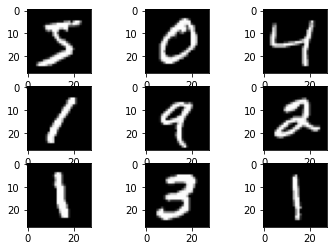

In [4]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
 
# show the figure
plt.show()

In [5]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 

# Performance Evaluation

In [6]:
import visualkeras

model_name = []
accuracy = []

def evalaute(model, name):
  res = model.evaluate(X_test,y_test)
  model_name.append(name)
  accuracy.append(res[1]*100)

  visualkeras.layered_view(model)

# LeNet

In [7]:
def lenet():
  #defining model
  model=Sequential()
  #adding convolution layer
  model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
  #adding pooling layer
  model.add(MaxPool2D(2,2))
  #adding fully connected layer
  model.add(Flatten())
  model.add(Dense(100,activation='relu'))
  #adding output layer
  model.add(Dense(10,activation='softmax'))
  #compiling the model
  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  #fitting the model
  model.fit(X_train,y_train,epochs=10)

  return model

In [8]:
lenet_model = lenet()

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.5253 - accuracy: 0.9235
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0902 - accuracy: 0.9743
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0631 - accuracy: 0.9813
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0499 - accuracy: 0.9852
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0413 - accuracy: 0.9873
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0368 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0288 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0263 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0206 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019

In [9]:
lenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [10]:
evalaute(lenet_model, 'LeNet')

313/313 [==============================] - 1s 2ms/step - loss: 0.1324 - accuracy: 0.9781


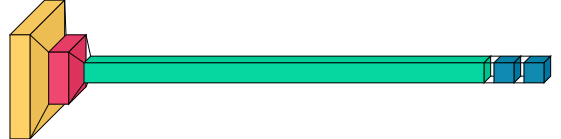

In [11]:
visualkeras.layered_view(lenet_model)

# AlexNet

In [12]:
def alexnet():
  model = keras.Sequential()
  model.add(layers.Conv2D(filters=96, kernel_size=(11, 11), 
                          strides=(4, 4), activation="relu", 
                          input_shape=(28,28,1), padding="same"))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
  model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), 
                          strides=(1, 1), activation="relu", 
                          padding="same"))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding="same"))
  model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                          strides=(1, 1), activation="relu", 
                          padding="same"))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                          strides=(1, 1), activation="relu", 
                          padding="same"))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), 
                          strides=(1, 1), activation="relu", 
                          padding="same"))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2),padding="same"))
  model.add(layers.Flatten())
  model.add(layers.Dense(4096, activation="relu"))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation="softmax"))
  model.compile(loss='sparse_categorical_crossentropy', 
                optimizer=tf.optimizers.SGD(lr=0.001), 
                metrics=['accuracy'])
  
  model.fit(X_train,y_train,epochs=10)

  return model

In [13]:
alexnet_model = alexnet()

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1875/1875 [==============================] - 16s 8ms/step - loss: 0.3417 - accuracy: 0.9048
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0967 - accuracy: 0.9724
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0660 - accuracy: 0.9805
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0515 - accuracy: 0.9851
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0405 - accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0339 - accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0265 - accuracy: 0.9922
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0227 - accuracy: 0.9937
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0191 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0158

In [14]:
alexnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 7, 7, 96)          11712     
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 96)         384       
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 96)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 256)         614656    
                                                                 
 batch_normalization_1 (Batc  (None, 3, 3, 256)        1024      
 hNormalization)                                                 
                                                      

In [15]:
evalaute(alexnet_model, 'AlexNet')

313/313 [==============================] - 2s 4ms/step - loss: 0.0373 - accuracy: 0.9882


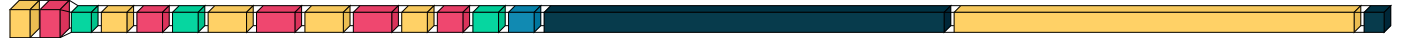

In [16]:
visualkeras.layered_view(alexnet_model)

# RiteshNet

In [17]:
def riteshnet():
  #defining model
  model=Sequential()
  #adding convolution layer
  model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
  model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), 
                          strides=(1, 1), activation="relu", 
                          padding="same"))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding="same"))
  model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                          strides=(1, 1), activation="relu", 
                          padding="same"))
  #adding fully connected layer
  model.add(Flatten())
  model.add(Dense(100,activation='relu'))
  #adding output layer
  model.add(Dense(10,activation='softmax'))
  #compiling the model
  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  #fitting the model
  model.fit(X_train,y_train,epochs=10)

  return model

In [18]:
riteshnet_model = riteshnet()

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1476 - accuracy: 0.9619
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0515 - accuracy: 0.9851
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0422 - accuracy: 0.9872
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0341 - accuracy: 0.9904
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0299 - accuracy: 0.9915
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0272 - accuracy: 0.9919
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0232 - accuracy: 0.9932
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0233 - accuracy: 0.9939
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0160 - accuracy: 0.9955
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

In [19]:
riteshnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_5 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 256)       205056    
                                                                 
 batch_normalization_6 (Batc  (None, 12, 12, 256)      1024      
 hNormalization)                                                 
                                                      

In [20]:
evalaute(riteshnet_model, 'RiteshNet')

313/313 [==============================] - 1s 3ms/step - loss: 0.0352 - accuracy: 0.9907


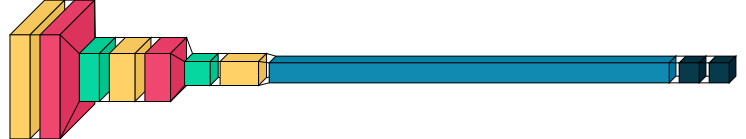

In [21]:
visualkeras.layered_view(riteshnet_model)

# Performance Comparison

In [22]:
di = {'Model': model_name, 'Accuracy': accuracy}
result_df = pd.DataFrame(di)
result_df

,Model,Accuracy
0,LeNet,97.810000
1,AlexNet,98.820001
2,RiteshNet,99.070001


In [23]:
import plotly.express as px

In [24]:
fig = px.bar(result_df, 
             x='Model', 
             y='Accuracy', 
             orientation='v', 
             barmode = 'group')
fig.update_layout(
    font_family="Times New Roman",
    title_font_family="Times New Roman",
    legend_title='',
    title = "Accuracy of Models"
)
fig.update_xaxes(title_font_family="Times New Roman", title='Models')
fig.update_yaxes(title_font_family="Times New Roman", title='Performance')
                  

fig.show()